# Retail Store Sales Forecasting with Neural Networks
## By Yasaman Ensafi 
### Ryerson Data Science and Analytics (MSc)
#### 2019

## Import libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

## Load Dataset

In [32]:
df= pd.read_csv('WA_Sales_Products_2012-14.csv',delimiter=',')

## EDA

In [33]:
df.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [34]:
df.describe()

,Year,Revenue,Quantity,Gross margin
count,88475.000000,8.847500e+04,88475.000000,87894.000000
mean,2012.855281,4.263829e+04,780.586166,0.449718
std,0.778342,6.578402e+04,1541.645422,0.123642
min,2012.000000,0.000000e+00,1.000000,-12.853678
25%,2012.000000,8.184360e+03,131.000000,0.369880
50%,2013.000000,2.102628e+04,333.000000,0.450634
75%,2013.000000,5.039060e+04,816.000000,0.520130
max,2014.000000,1.635688e+06,67875.000000,0.770476


## Maybe we need to normalize Quantity

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88475 entries, 0 to 88474
Data columns (total 11 columns):
Retailer country     88475 non-null object
Order method type    88475 non-null object
Retailer type        88475 non-null object
Product line         88475 non-null object
Product type         88475 non-null object
Product              88475 non-null object
Year                 88475 non-null int64
Quarter              88475 non-null object
Revenue              88475 non-null float64
Quantity             88475 non-null int64
Gross margin         87894 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 7.4+ MB


## Missing Data

In [36]:
# There are 581 data with Revenue= 0 therefore their Gross margin is Nan
missing = sum(df['Gross margin'].isnull())
missing_percent = np.round(missing / len(df) *100,2)
print("Percentage of missing data:",missing_percent)
df=df.dropna()
#df['margin'] = df['margin'].fillna(0)
#shape has changed from (88475, 11) to (87894, 11)

Percentage of missing data: 0.66


In [37]:
df.shape

(87894, 11)

In [40]:
df.columns

Index(['retailer country', 'order method type', 'retailer type',
       'product line', 'product type', 'product', 'year', 'quarter', 'revenue',
       'quantity', 'gross margin'],
      dtype='object')

## Edit columns names

In [41]:
# Lower case column names
df.columns = map(str.lower, df.columns)
df.columns

Index(['retailer country', 'order method type', 'retailer type',
       'product line', 'product type', 'product', 'year', 'quarter', 'revenue',
       'quantity', 'gross margin'],
      dtype='object')

In [42]:
# delete spaces
df = df.rename(columns={'retailer country': 'retailer_country'})
df = df.rename(columns={'order method type': 'order_method_type'})
df = df.rename(columns={'retailer type': 'retailer_type'})
df = df.rename(columns={'product line': 'product_line'})
df = df.rename(columns={'product type': 'product_type'})
df = df.rename(columns={'gross margin': 'gross_margin'})
df.columns

Index(['retailer_country', 'order_method_type', 'retailer_type',
       'product_line', 'product_type', 'product', 'year', 'quarter', 'revenue',
       'quantity', 'gross_margin'],
      dtype='object')

## Observe the contents of each column

In [43]:
print("Unique Country:",len(set(df["retailer_country"])))
print("Unique Order method:",len(set(df["order_method_type"])))
print("Unique retailer type:",len(set(df["retailer_type"])))
print("Unique product line:",len(set(df["product_line"])))
print("Unique product type:",len(set(df["product_type"])))
print("Unique product:",len(set(df["product"])))
print("Revenue mean:",np.round(np.mean(df["revenue"]),2))
print("Quantity mean:",np.round(np.mean(df["quantity"]),2))
print("Gross margin mean:",np.round(np.mean(df["gross_margin"]),2))

Unique Country: 21
Unique Order method: 7
Unique retailer type: 8
Unique product line: 5
Unique product type: 21
Unique product: 144
Revenue mean: 42920.14
Quantity mean: 784.84
Gross margin mean: 0.45


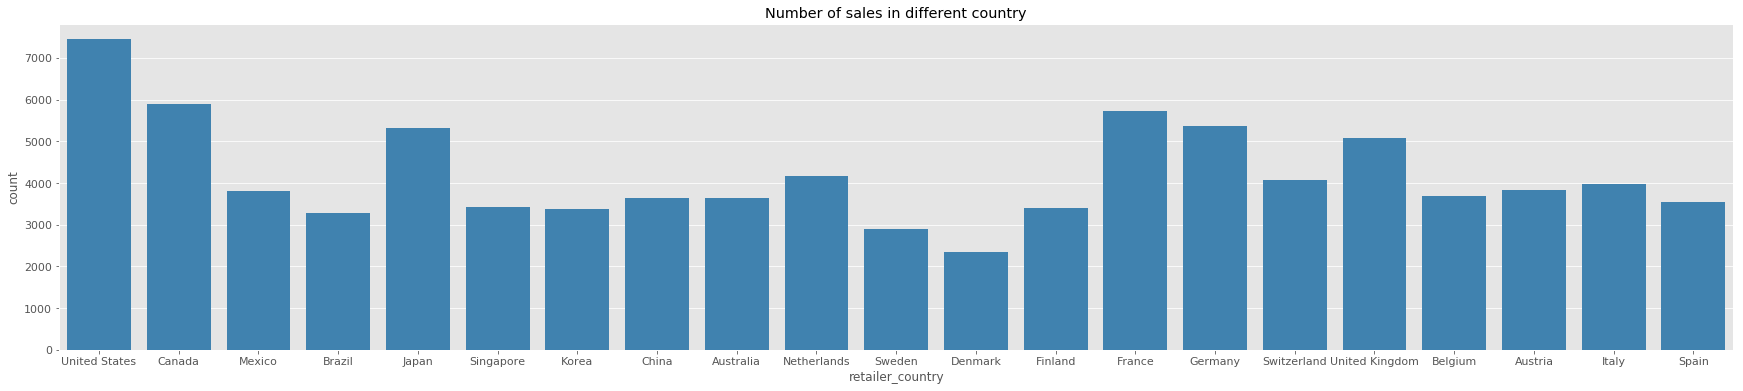

In [88]:
plt.figure(figsize = (30,6))
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11) 
sns.countplot(df['retailer_country'],color='#2E86C1')
plt.title("Number of sales in different country")
plt.show()

In the above bar chart we can see the number of sales in different countries.

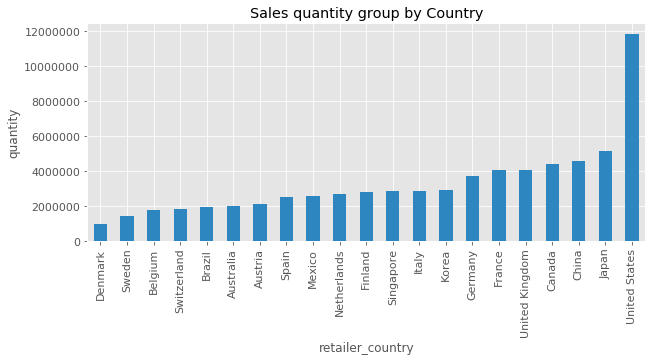

In [103]:
ax=plt.figure(figsize=(10,4))
df.groupby('retailer_country')['quantity'].sum().sort_values().plot('bar',color='#2E86C1')
plt.title("Sales quantity group by Country")
plt.ylabel("quantity")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In the above bar chart, we want to find the location of retail store with highest amount of sold items. So by generating a bar chart, we can say that US has sold near twelve million items.

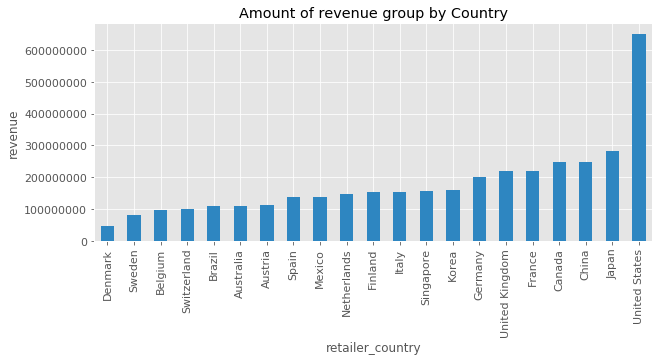

In [105]:
ax=plt.figure(figsize=(10,4))
df.groupby('retailer_country')['revenue'].sum().sort_values().plot('bar',color='#2E86C1')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Amount of revenue group by Country")
plt.ylabel("revenue")
plt.show()

And here we can see the amount of revenue in different country. We can conclude that in most cases, the country with more amount of sales has gained more amount of revenue. However, In the case of Italy an Finland, and UK and France it's not the same.

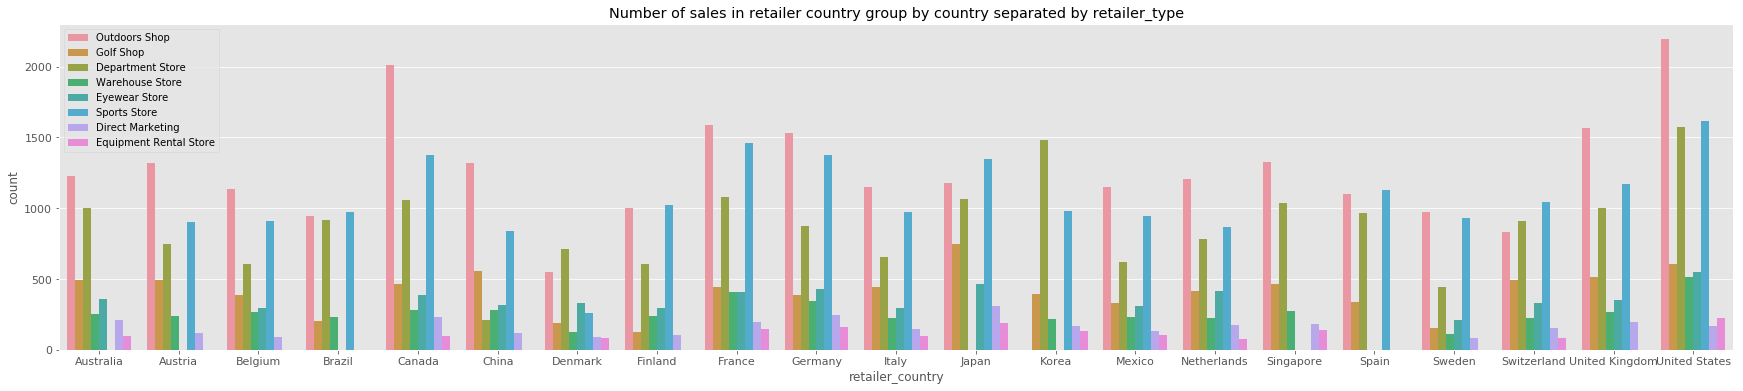

In [121]:
plt.figure(figsize = (30,6))
sns.countplot(df.sort_values(by=['retailer_country'])['retailer_country'], hue=df["retailer_type"])
plt.legend( loc="upper left")
plt.title("Number of sales in retailer country group by country separated by retailer_type")
plt.show()

We can compare retailer type in different countries. In most of the countries Outdoorshops have the most amount of sales.

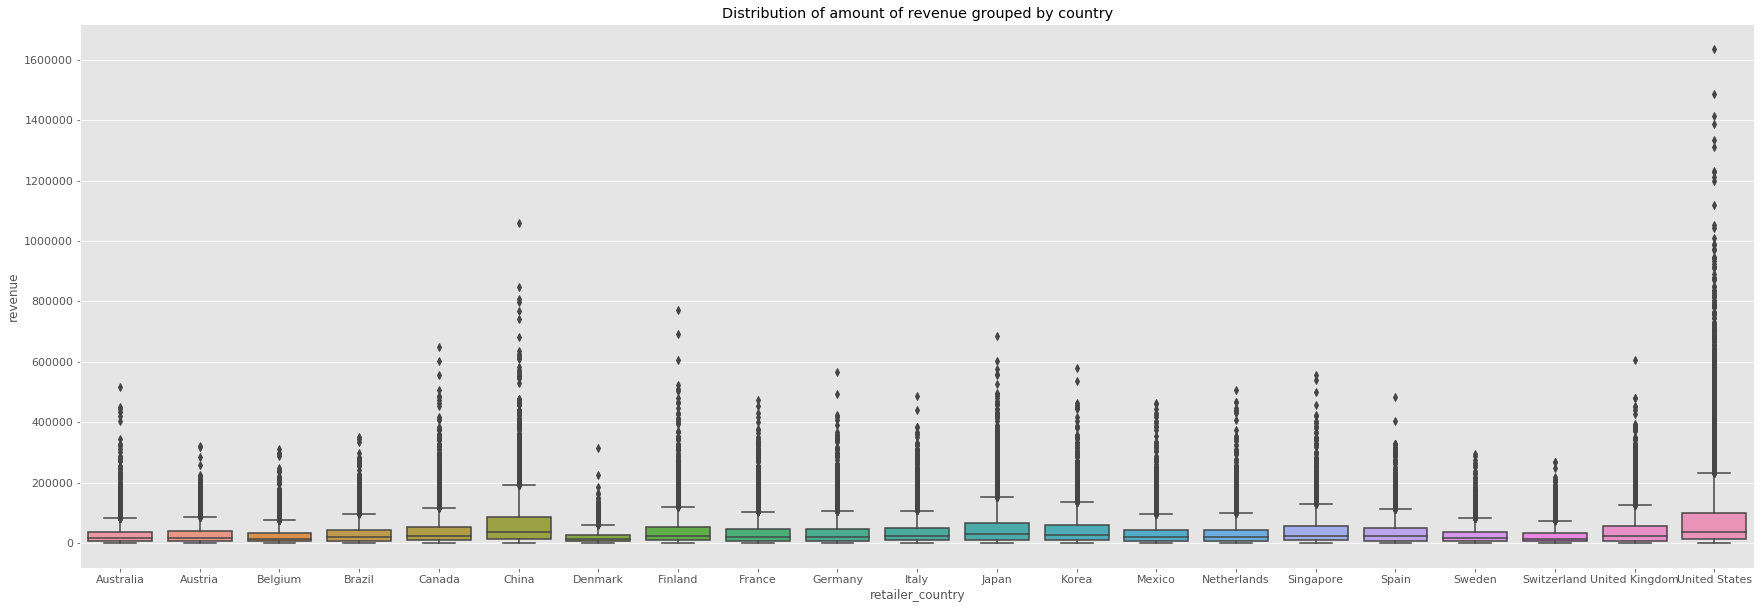

In [122]:
plt.figure(figsize = (30,10))
plt.title("Distribution of amount of revenue grouped by country")
sns.boxplot(df.sort_values(by=['retailer_country'])['retailer_country'],df['revenue'], data = df)
plt.show()

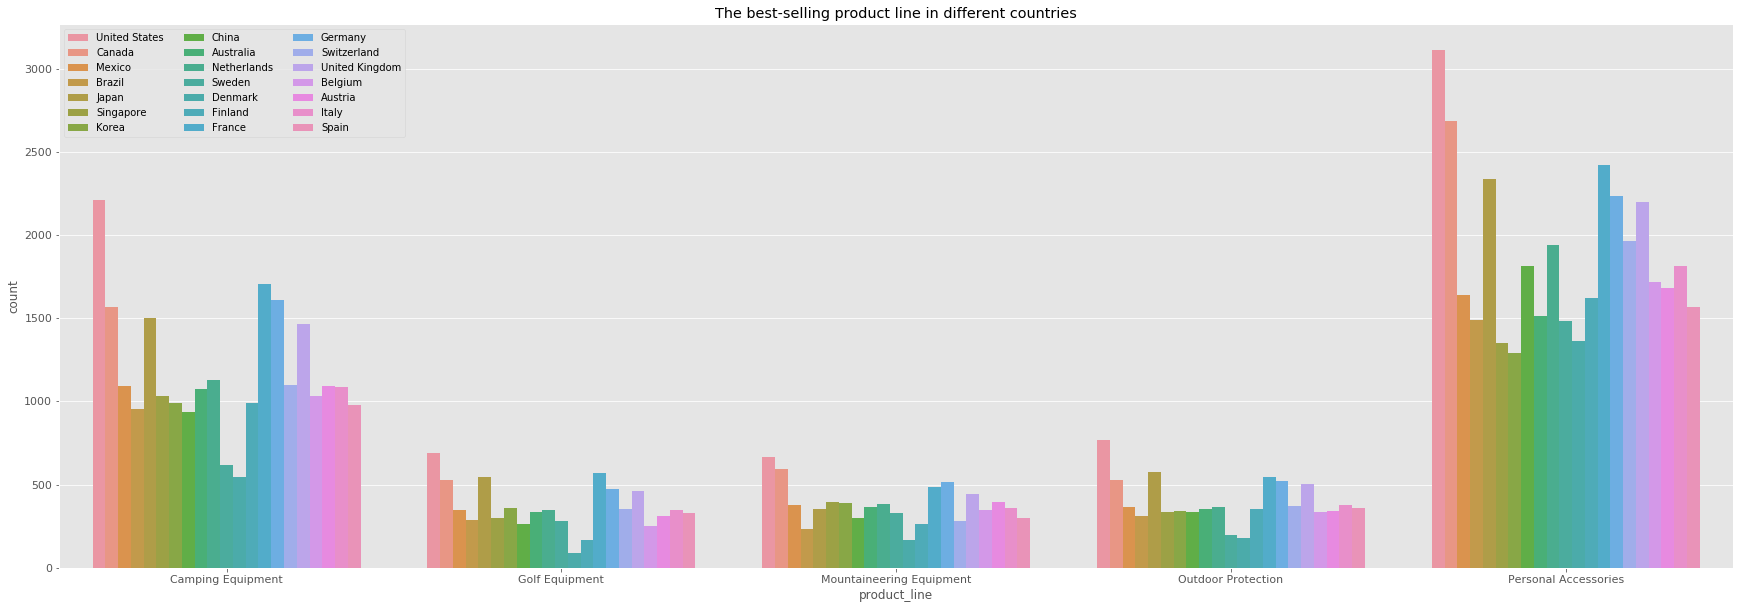

In [134]:
plt.figure(figsize = (30,10))
sns.countplot(df.sort_values(by=['product_line'])['product_line'], hue=df["retailer_country"])
plt.legend( loc="upper left" ,ncol=3)
plt.title("The best-selling product line in different countries")
plt.show()

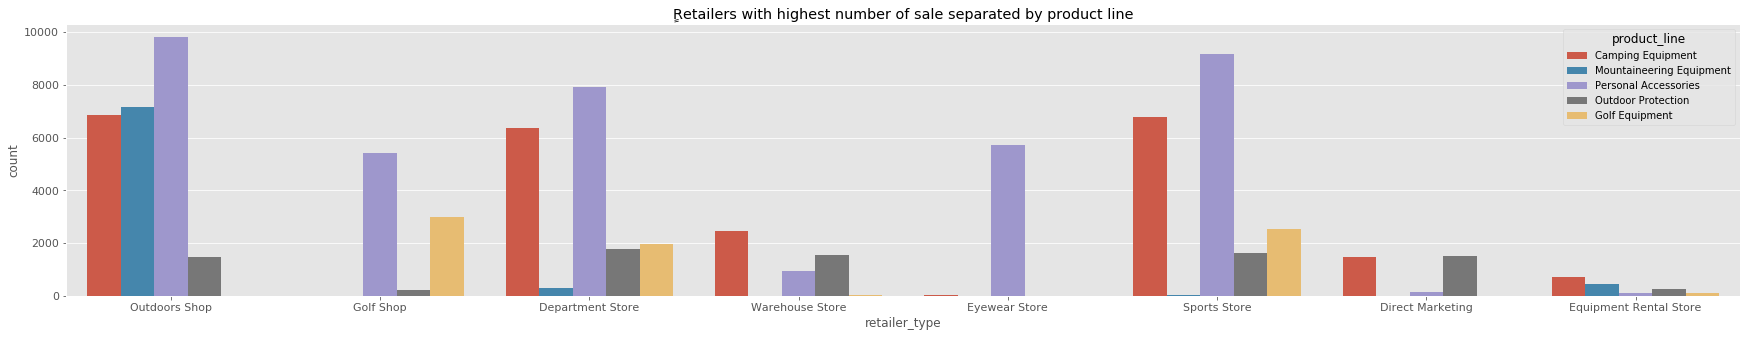

In [135]:
plt.figure(figsize = (30,5))
sns.countplot(df['retailer_type'], hue=df["product_line"])
plt.title("ٍٍRetailers with highest number of sale separated by product line")
plt.show()

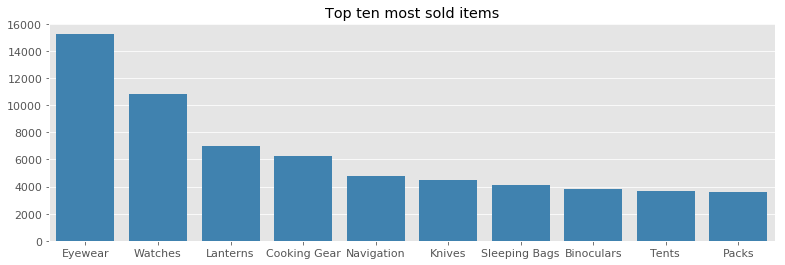

In [140]:
#Top ten most sold items
plt.figure(figsize=(13,4))
top10 = df['product_type'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=top10.index,y=top10.values,color='#2E86C1')
plt.title("Top ten most sold items")
plt.show()

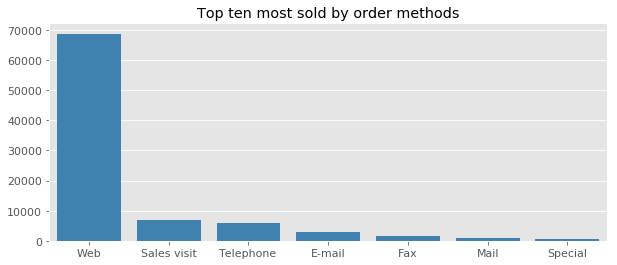

In [149]:
#Top ten most sold items
plt.figure(figsize=(10,4))
top10 = df['order_method_type'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=top10.index,y=top10.values,color='#2E86C1')
plt.title("Top ten most sold by order methods")
plt.show()

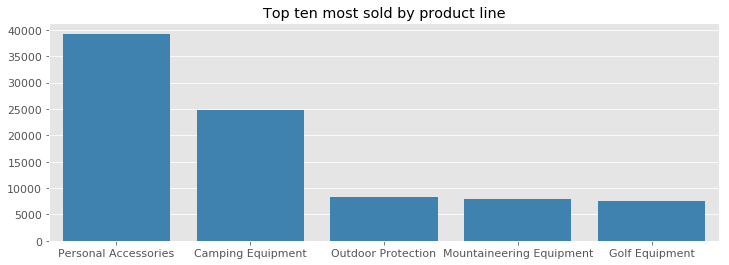

In [161]:
#Top ten most sold items
plt.figure(figsize=(12,4))
top10 = df['product_line'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=top10.index,y=top10.values,color='#2E86C1')
plt.title("Top ten most sold by product line")
plt.show()

In [162]:
df.groupby(['retailer_country','year', 'quarter']).head()


,retailer_country,order_method_type,retailer_type,product_line,product_type,product,year,quarter,revenue,quantity,gross_margin,date,date2
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548,2012-01-01,2012-03-31
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274,2012-01-01,2012-03-31
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772,2012-01-01,2012-03-31
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938,2012-01-01,2012-03-31
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450,2012-01-01,2012-03-31
864,Canada,Fax,Outdoors Shop,Personal Accessories,Watches,Venue,2012,Q1 2012,12045.00,165,0.418630,2012-01-01,2012-03-31
865,Canada,Fax,Outdoors Shop,Personal Accessories,Watches,TX,2012,Q1 2012,20960.00,114,0.450544,2012-01-01,2012-03-31
866,Canada,Fax,Outdoors Shop,Personal Accessories,Watches,Legend,2012,Q1 2012,3740.00,17,0.473455,2012-01-01,2012-03-31
867,Canada,Fax,Outdoors Shop,Personal Accessories,Watches,Kodiak,2012,Q1 2012,33445.20,271,0.455317,2012-01-01,2012-03-31
868,Canada,Fax,Outdoors Shop,Personal Accessories,Eyewear,Capri,2012,Q1 2012,23784.30,621,0.340707,2012-01-01,2012-03-31


In [157]:
#total quantity of products on this file
df['quantity'].sum()

68982844

In [158]:
#Quantity grouped by country
df.groupby(['retailer_country'])['quantity'].sum()

retailer_country
Australia          1997370
Austria            2098889
Belgium            1796606
Brazil             1955624
Canada             4416544
China              4592685
Denmark             961410
Finland            2783275
France             4039461
Germany            3729659
Italy              2847053
Japan              5132069
Korea              2928531
Mexico             2542248
Netherlands        2682856
Singapore          2844655
Spain              2524475
Sweden             1400559
Switzerland        1819762
United Kingdom     4047296
United States     11841817
Name: quantity, dtype: int64

In [159]:
#Quantity per Quarter ?
df.groupby(['year', 'quarter'])['quantity'].sum()

year  quarter
2012  Q1 2012    6256375
      Q2 2012    5570452
      Q3 2012    5553169
      Q4 2012    6119706
2013  Q1 2013    6068162
      Q2 2013    6781921
      Q3 2013    6467989
      Q4 2013    6595879
2014  Q1 2014    8364634
      Q2 2014    8336147
      Q3 2014    2868410
Name: quantity, dtype: int64

In [160]:
df.groupby(['retailer_country'])['revenue'].sum()

retailer_country
Australia         1.093000e+08
Austria           1.133666e+08
Belgium           9.695857e+07
Brazil            1.090657e+08
Canada            2.468877e+08
China             2.488232e+08
Denmark           4.789853e+07
Finland           1.522220e+08
France            2.195236e+08
Germany           2.007737e+08
Italy             1.546308e+08
Japan             2.816655e+08
Korea             1.585741e+08
Mexico            1.393696e+08
Netherlands       1.489364e+08
Singapore         1.562618e+08
Spain             1.367638e+08
Sweden            8.063553e+07
Switzerland       1.007319e+08
United Kingdom    2.192231e+08
United States     6.508110e+08
Name: revenue, dtype: float64

In [163]:
df_region = pd.get_dummies(df)
print(df_region.columns)
df_region = pd.get_dummies(df,drop_first=True)
print(df_region.columns)

Index(['year', 'revenue', 'quantity', 'gross_margin', 'date', 'date2',
       'retailer_country_Australia', 'retailer_country_Austria',
       'retailer_country_Belgium', 'retailer_country_Brazil',
       ...
       'quarter_Q1 2013', 'quarter_Q1 2014', 'quarter_Q2 2012',
       'quarter_Q2 2013', 'quarter_Q2 2014', 'quarter_Q3 2012',
       'quarter_Q3 2013', 'quarter_Q3 2014', 'quarter_Q4 2012',
       'quarter_Q4 2013'],
      dtype='object', length=223)
Index(['year', 'revenue', 'quantity', 'gross_margin', 'date', 'date2',
       'retailer_country_Austria', 'retailer_country_Belgium',
       'retailer_country_Brazil', 'retailer_country_Canada',
       ...
       'quarter_Q1 2013', 'quarter_Q1 2014', 'quarter_Q2 2012',
       'quarter_Q2 2013', 'quarter_Q2 2014', 'quarter_Q3 2012',
       'quarter_Q3 2013', 'quarter_Q3 2014', 'quarter_Q4 2012',
       'quarter_Q4 2013'],
      dtype='object', length=216)


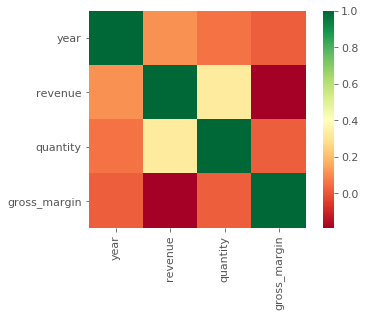

In [164]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [165]:
#use pd.PeriodIndex as a first step, then convert to timestamp using PeriodIndex.to_timestamp
df['date'] = pd.to_datetime(df['quarter'].str.replace(r'(Q\d) (\d+)', r'\2-\1'), errors='coerce')

In [166]:
df['date2']=pd.to_datetime(df['date']) + pd.offsets.QuarterEnd(0)
#By default it gives you the start date of the quarter so I added an offset
#https://stackoverflow.com/questions/18233107/pandas-convert-datetime-to-end-of-month

In [167]:
set(df['date'])

{Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00')}

In [168]:
set(df['date2'])

{Timestamp('2012-03-31 00:00:00'),
 Timestamp('2012-06-30 00:00:00'),
 Timestamp('2012-09-30 00:00:00'),
 Timestamp('2012-12-31 00:00:00'),
 Timestamp('2013-03-31 00:00:00'),
 Timestamp('2013-06-30 00:00:00'),
 Timestamp('2013-09-30 00:00:00'),
 Timestamp('2013-12-31 00:00:00'),
 Timestamp('2014-03-31 00:00:00'),
 Timestamp('2014-06-30 00:00:00'),
 Timestamp('2014-09-30 00:00:00')}

In [217]:
#test_df = df.loc[df['product'] == 'Star Gazer 2'].loc[df['order_method_type'] == 'Web' ].loc[df['retailer_country'] == 'Canada' ].loc[df['retailer_type'] == 'Sports Store' ]
test_df=df.loc[df['product'] == 'TrailChef Double Flame'].loc[df['order_method_type'] == 'Web' ].loc[df['retailer_country'] == 'Canada' ].loc[df['retailer_type'] == 'Sports Store' ]
#test_df=df.loc[df['product'] == 'Kodiak'].loc[df['order_method_type'] == 'Web' ].loc[df['retailer_country'] == 'United States' ].loc[df['retailer_type'] == 'Sports Store' ]

#test_df.groupby(['retailer_type','year', 'quarter']).head()



In [218]:
test_df

,retailer_country,order_method_type,retailer_type,product_line,product_type,product,year,quarter,revenue,quantity,gross_margin,date,date2
1354,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,41371.40,290,0.474274,2012-01-01,2012-03-31
9942,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q2 2012,38090.22,267,0.474274,2012-04-01,2012-06-30
18722,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q3 2012,59203.90,415,0.474274,2012-07-01,2012-09-30
27169,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q4 2012,49931.00,350,0.474274,2012-10-01,2012-12-31
35156,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2013,Q1 2013,20473.56,142,0.479817,2013-01-01,2013-03-31
43617,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2013,Q2 2013,25952.40,180,0.479817,2013-04-01,2013-06-30
51934,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2013,Q3 2013,51616.44,358,0.479817,2013-07-01,2013-09-30
60321,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2013,Q4 2013,40947.12,284,0.479817,2013-10-01,2013-12-31
68230,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2014,Q1 2014,98907.48,686,0.479817,2014-01-01,2014-03-31
76604,Canada,Web,Sports Store,Camping Equipment,Cooking Gear,TrailChef Double Flame,2014,Q2 2014,75117.78,521,0.479817,2014-04-01,2014-06-30


In [204]:
test_df = test_df.set_index('date2')

In [205]:
test_df.index

DatetimeIndex(['2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30'],
              dtype='datetime64[ns]', name='date2', freq=None)

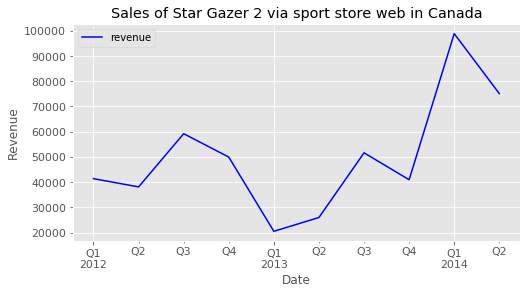

In [206]:
test_df= test_df[['revenue']]
ax= test_df.plot(color='blue',figsize=(8,4))
ax.set_xlabel("Date")
ax.set_ylabel('Revenue')
ax.set_title("Sales of Star Gazer 2 via sport store web in Canada")
plt.show()

Text(0,0.5,'Revenue')

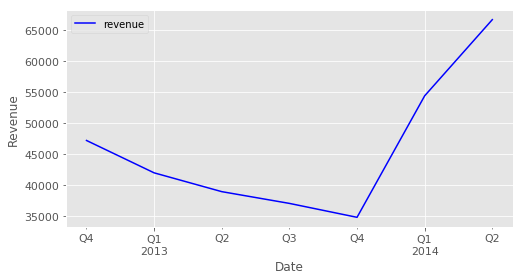

In [207]:
test_df_mean=test_df.rolling(window=4).mean()
#print(test_df_mean)
#print(test_df)
ax= test_df_mean.plot(color='blue',figsize=(8,4))
ax.set_xlabel("Date")
ax.set_ylabel('Revenue')

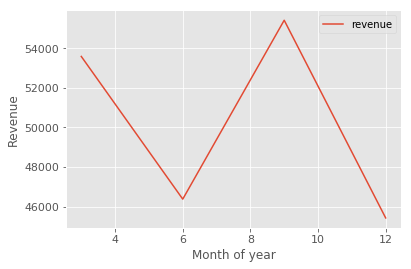

In [208]:
#test_df.index.month
index_month=test_df.index.month
df_by_month= test_df.groupby(index_month).mean()
df_by_month.plot()
plt.xlabel("Month of year")
plt.ylabel("Revenue")
plt.show()

In [209]:
index_month

Int64Index([3, 6, 9, 12, 3, 6, 9, 12, 3, 6], dtype='int64', name='date2')

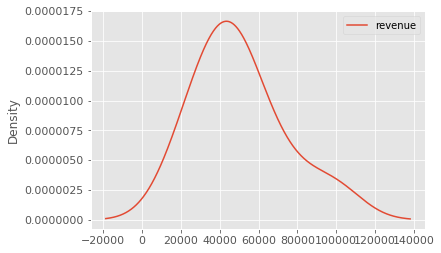

In [210]:
ax1= test_df.plot(kind='density')


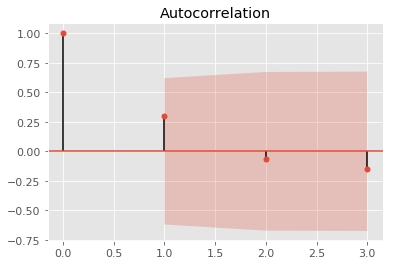

In [211]:
fig= tsaplots.plot_acf(test_df['revenue'],lags=3)
plt.show()

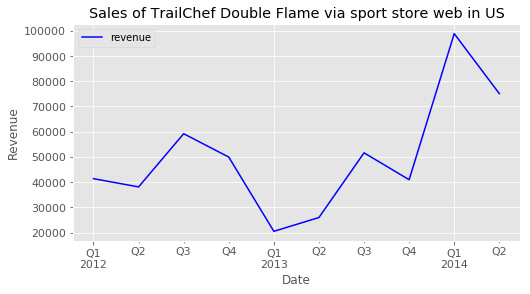

In [212]:
#test_df= test_df[['revenue']]
ax= test_df.plot(color='blue',figsize=(8,4))
ax.set_xlabel("Date")
ax.set_ylabel('Revenue')
ax.set_title("Sales of TrailChef Double Flame via sport store web in US")
plt.show()

In [213]:
'''rcParams['figure.figsize']=11,9
decomposition = sm.tsa.seasonal_decompose(test_df['revenue'],freq=9)
fig= decomposition.plot()
plt.show()'''

"rcParams['figure.figsize']=11,9\ndecomposition = sm.tsa.seasonal_decompose(test_df['revenue'],freq=9)\nfig= decomposition.plot()\nplt.show()"

## Differencing

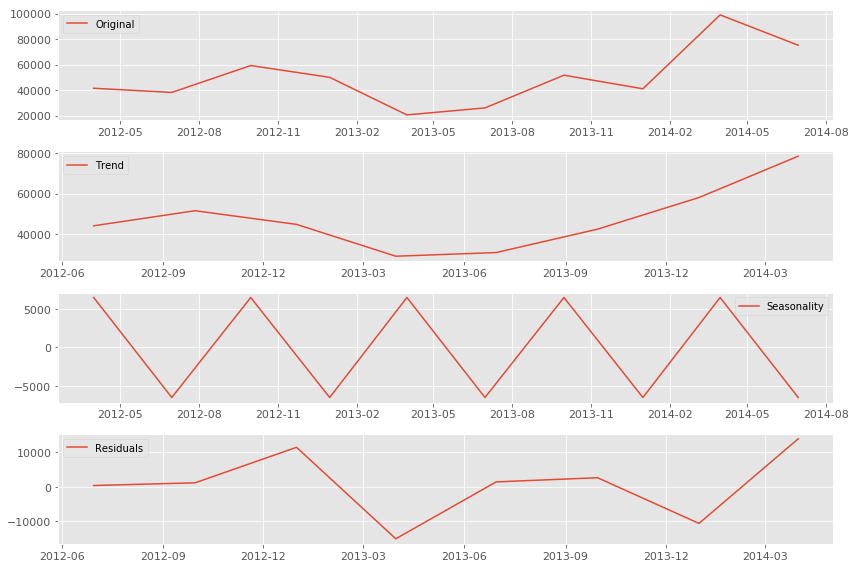

In [214]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(test_df,freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(test_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [215]:
print((decomposition.trend))

              revenue
date2                
2012-03-31        NaN
2012-06-30  44188.935
2012-09-30  51607.255
2012-12-31  44884.865
2013-03-31  29207.630
2013-06-30  30998.700
2013-09-30  42533.100
2013-12-31  58104.540
2014-03-31  78469.965
2014-06-30        NaN
